<a href="https://colab.research.google.com/github/Briana-Sevilla/MAT-421/blob/main/Module_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Set 7: Module F**

## Section 20.1: Numerical Differentiation Problem Statement

**Numerical Grid**: a set of points over a function's domain with step size $h$. Since the spaces are even, $h$ can be calculated with the following:
$h = x_{j-1}-x_j$,

where:
- $x_j$ is the $j$th point of numerical grid $x$
>Note: $j>j-1$

To make a one-dimensional numerical grid, use Python's *linspace()* function.

\\

---

\\
## Section 20.2: Finite Difference Approximating Derivatives

A derivative at a certain point is the function's instantaneous slope at that point.

Three of the many types of **finite difference**  formulas are below. These formulas use two points of a function to estimate the slope of the line that passes through them are:

- **Forward Difference**

  Formula:
  $f'(x_j)=\frac{f(x_{j+1})-f(x_j)}{x_{j+1}-x_j}$,
  
  where $(x_j,f(x_j))$ and $(x_{j+1},f(x_{j+1}))$ are our points

\\

- **Backward Difference**

  Formula:
  $f'(x_j)=\frac{f(x_j)-f(x_{j-1})}{x_j-x_{j-1}}$,
  
  where $(x_{j-1},f(x_{j-1}))$ and $(x_j,f(x_j))$ are our points
  
\\

- **Central Difference**

  Formula:
  $f'(x_j)=\frac{f(x_{j+1})-f(x_{j-1})}{x_{j+1}-x_{j-1}}$,
  
  where $(x_{j-1},f(x_{j-1}))$ and $(x_{j+1},f(x_{j+1}))$ are our points

\\
The following are examples of these formulas with function $f(x)=2x^2+1$ and points $(3,19),(6,73),(9,163)$:

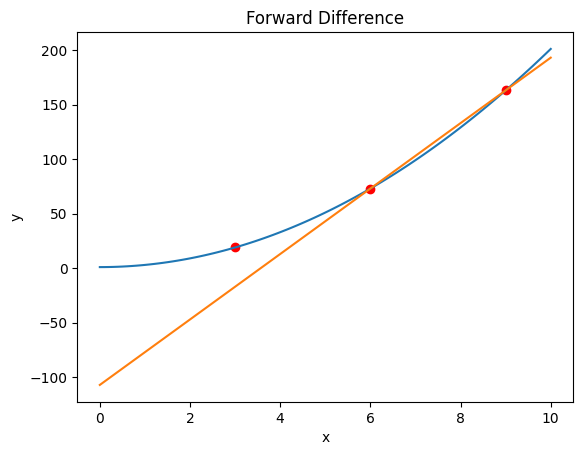

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x= np.linspace(0,10,100)
y = 2*x**2+1

# Line that goes through 2nd and 3rd point
forward_diff = (90/3)*x - 107

plt.plot(x,y)
plt.plot(x,forward_diff)
plt.scatter(3,19,color='red')
plt.scatter(6,73,color='red')
plt.scatter(9,163,color='red')
plt.title('Forward Difference')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

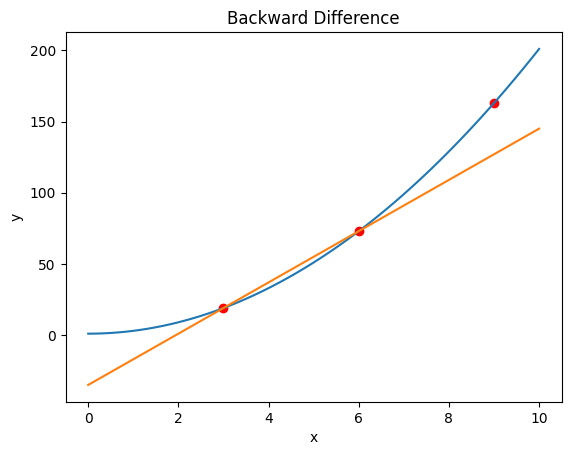

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x= np.linspace(0,10,100)
y = 2*x**2+1

# Line that goes through 1st and 2nd point
forward_diff = (54/3)*x - 35

plt.plot(x,y)
plt.plot(x,forward_diff)
plt.scatter(3,19,color='red')
plt.scatter(6,73,color='red')
plt.scatter(9,163,color='red')
plt.title('Backward Difference')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

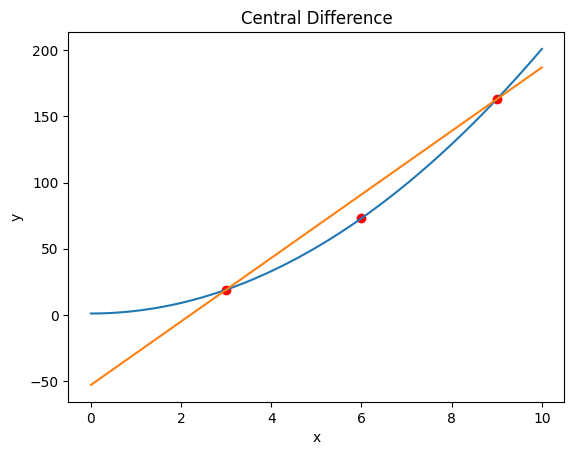

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x= np.linspace(0,10,100)
y = 2*x**2+1

# Line that goes through 1st and 3rd point
forward_diff = (144/6)*x - 53

plt.plot(x,y)
plt.plot(x,forward_diff)
plt.scatter(3,19,color='red')
plt.scatter(6,73,color='red')
plt.scatter(9,163,color='red')
plt.title('Central Difference')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Using the Taylor series, we can rewrite each finite difference formula above to approximate derivatives:

- **Forward Difference**

  Formula:
  $f'(x_j)=\frac{f(x_{j+1})-f(x_j)}{h}$,
  
  where
  
  - $(x_j,f(x_j))$ and $(x_{j+1},f(x_{j+1}))$ are our points
  - $h$ is our step size

\\

- **Backward Difference**

  Formula:
  $f'(x_j)=\frac{f(x_j)-f(x_{j-1})}{h}$,
  
  where
  - $(x_{j-1},f(x_{j-1}))$ and $(x_j,f(x_j))$ are our points
  - $h$ is our step size
  
\\

- **Central Difference**

  Formula:
  $f'(x_j)=\frac{f(x_{j+1})-f(x_{j-1})}{2h}$,
  
  where
  - $(x_{j-1},f(x_{j-1}))$ and $(x_{j+1},f(x_{j+1}))$ are our points
  - $h$ is our step size


\\

---

\\
## Section 20.3: Approximating of Higher Order Derivatives

The Taylor series can also approximate higher order derivatives.

For example, using the Taylor series to find the second derivative of a function $f$ around $a=x_j$ and then computing it at $x=x_{j-1}$ and $x=x_{j+1}$ gives us the following:

$f''(x_j) \approx \frac{f(x_{j+1})-2f(x_j)+f(x_{j-1})}{h^2}$

\\

---

\\
## Section 20.4: Numerical Differentiation with Noise

**Noise**: the error of a value not calculated by a pure mathematical function.

For example, say we have the following functions:

$f(x)=sin(x)$

$f_{\epsilon,\omega}(x) = sin(x)+\epsilon cos(\omega x)$

where
- $\epsilon$ is a small number from $(0,1)$
-$\omega$ is a large number
>Note: $f(x) ≃ f_{\epsilon, \omega}(x)$

Even though $\omega$ is a large number, the 2nd term is small since we are multiplying by a small number $\epsilon$

To verify the closeness of these two functions, let $\epsilon = 0.001$ and $\omega = 1000$.

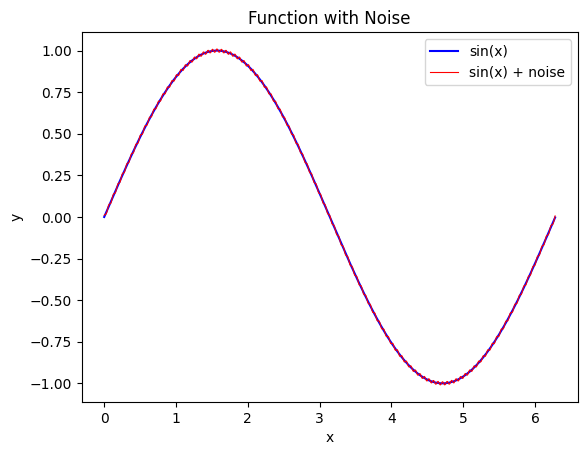

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,2*np.pi,0.01)

# Define and compute function
epsilon = 0.01
omega = 100

y = np.sin(x)
y_noise = np.sin(x) + epsilon*np.cos(omega*x)

# Plot the function
plt.plot(x,y,color='blue',linewidth=1.5, \
         label = 'sin(x)')
plt.plot(x,y_noise,color='red',linewidth=0.8, \
         label = 'sin(x) + noise')
plt.legend()
plt.title('Function with Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As you can see, the functions are very close. However, we start to see the difference when we calculate their derivative!

Lets plot the derivative of each function with the same values of $\epsilon$ and $\omega$.

>Note: $f'(x)=cos(x)$ and $f'_{\epsilon,\omega}(x) = cos(x)-\epsilon \omega sin(\omega x)$

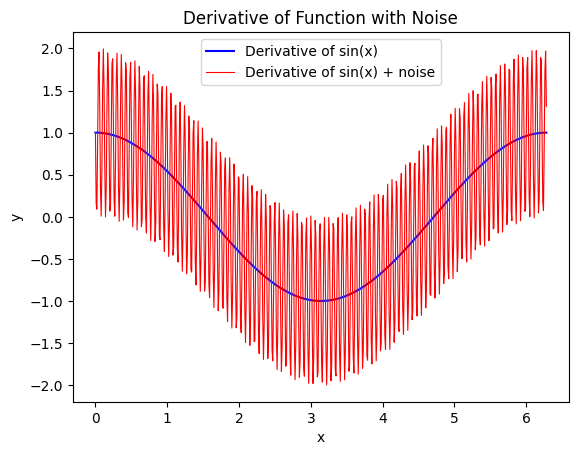

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,2*np.pi,0.01)

# Define and compute function
epsilon = 0.01
omega = 100

y = np.cos(x)
y_noise = np.cos(x) - epsilon*omega*np.sin(omega*x)

# Plot the function
plt.plot(x,y,color='blue',linewidth=1.5, \
         label = 'Derivative of sin(x)')
plt.plot(x,y_noise,color='red',linewidth=0.8, \
         label = 'Derivative of sin(x) + noise')
plt.legend()
plt.title('Derivative of Function with Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As you can see, $f(x)$ and $f_{\epsilon, \omega}(x)$ do not seem so close anymore, making the derivative unusable.

\\

$ ♡ End ♡ $